In [1]:
from parameters import Parameters
from generate_graph import Graph
from solve_baseline import Model_Baseline, Multiobjective_model
from pymoo.core.problem import starmap_parallelized_eval
from parameters import Parameters
from heuristic import Elementwise_heuristic, Vectorized_heuristic, Minimize
from pymoo.factory import get_performance_indicator
import multiprocessing as mp
    
# The code below is solving the multiobjective problem using the heuristic and the model.
set_seed = 1
plot_graph = True
verbose = False
nsga3 = True
# Increasing num_of_collection_centers takes alot more time.
num_of_collection_centers = 5
RandomGraph = Graph(num_of_collection_centers,baseline=True,plot_graph=plot_graph, seed=set_seed, baseline_scaler=5)
parameters = Parameters(RandomGraph, set_seed)


In [2]:
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.factory import get_termination
three_objective_problem = Vectorized_heuristic(parameters)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.1,
                                                      n_last=20,
                                                      nth_gen=1,
                                                      n_max_gen=500,
                                                      n_max_evals=None)

minimization = Minimize(problem = three_objective_problem, population_size = 900, termination = termination, verbose = True, nsga3 = nsga3, seed = 1)
result_vectorized = minimization.minimize_heuristic()
print('Time for 3 objective execution Vectorized:', result_vectorized.exec_time)

Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.
n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     900 |  6.95042E+03 |  1.11042E+04 |       1 |            - |            -
    2 |    1800 |  3.27806E+01 |  1.18148E+02 |       1 |  1.54875E+07 |        ideal
    3 |    2700 |  3.17806E+01 |  7.80455E+01 |       1 |  1.20574E+06 |        ideal
    4 |    3600 |  3.17806E+01 |  6.42666E+01 |       1 |  0.00000E+00 |            f
    5 |    4500 |  2.43086E+01 |  5.48957E+01 |       1 |  1.62384E+07 |        ideal
    6 |    5400 |  2.37227E+01 |  4.73873E+01 |       1 |  8.31975E+07 |        ideal
    7 |    6300 |  2.20272E+01 |  4.13730E+01 |       1 |  2.92382E+07 |        ideal
    8 |    7200 |  1.90214E+01 |  3.63277E+01 |       1 |  9.24803E+06 |        ideal
    9 |    8100 |  1.65486E+01 |  3.23814E+01 |       1 |  3.01047E+07 |        ideal
   10 |    9000 |  1.51647E+01 |  2.88824E

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.21538308e+08 1.46335400e+02 2.72269941e+05]
 [1.21736864e+08 1.46335400e+02 2.72267632e+05]
 [1.21538315e+08 1.46335400e+02 2.72267652e+05]]
[True False False True False False True False False True False False True
 False False True False False True False False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1.8100108055692314 1.8099981990614338 1.8099982075120966
 1.8099981969643113 1.80999819696431 1.8099981969643086 1.8099981969643077
 2.227581780754745 2.219903089992419 2.2199030264168473 2.219903025708998
 2.219903025708998 2.219705528597933 2.220100522

(array([1.21538308e+08, 1.46335400e+02, 2.72269941e+05]), array([0.]))

In [6]:
import numpy as np
a = np.array([1,2,3,4,5,6])
b = np.array([2,3,4,5,6,7])
np.where((a > 1) & (b < 4))

(array([1]),)

In [7]:
import numpy as np
print(np.abs(np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 1) - three_objective_problem.supplies) - 1e-3)
a = np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 0)
print(np.sum(result_vectorized.X[0][three_objective_problem.continuous_jk_kp_slice].reshape(7,13), axis = 1) - a)
print()

[-0.001 -0.0009999999999982237 -0.001 -0.001 -0.0009999999999928946]
[1.4210854715202004e-14 1.7763568394002505e-15 0.0 0.0
 3.552713678800501e-15 1.7763568394002505e-15 0.0]



In [4]:
three_objective_problem.evaluate(result_vectorized.X[0], t=True)


[[-0.001 -0.0009999999999982237 -0.001 -0.001 -0.0009999999999928946
  -0.0009999999999857892 -0.0009999999999982237 -0.001 -0.001
  -0.0009999999999964473 -0.0009999999999982237 -0.001 -47.99473700690222
  -91.86001951319588 -40.10850499188102 -40.67783999477005
  -39.600878591627016 -39.60097588225664 -39.60104401936716
  -21.997231113558385 -19.11278148694386 0.6355983176617386
  2.0630546289421416 5.35204873499549 3.875575005923972 1.807527427123503
  -40.14797587410603 -44.3436654117342 -44.43387038138809
  -44.34505627106057 -44.449241798597 -44.34798177725868
  -55.10740109443026 -79.31975884800681 -31.38058481503389
  -15.380560444938299 -79.3805647485774 -31.38056502477469
  -47.380565024238635 -7.009452164326337 -15.43564804009725
  -62.92610209983973 -14.770448305240814 -14.770449795997292
  -62.77044979724129 -30.770449797257285 -53.322297200986625
  -14.608867232441314 -13.260621139964352 -14.058625138279023
  -12.981119934873176 -12.981200607202211 -12.981268746253296
  -

(array([1.06598323e+08, 1.37907700e+02, 2.51477194e+05]), array([13.73380411]))

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.59117521e+08 1.46335400e+02 2.72798660e+05]]
[True False False True False False True False False True False False True
 False False True False False True False False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 3 1 3 4 4 2 1 2 1 1 1 1 2 1
 2 1 3 1 5 5 4 2 1 2 1 2 1 2 3 1 3 2 3 3 1 3 1 5 1 2 1 1 1 3 6 1 5 5 1 1 1
 3 6 1 7 2 1 4 2 4 1 5 2 1 1 1 2 3 6 2 3 2 2 1 5 2 2 1 3 3 3 4 5 1 3 3 5 3
 2 7 6 2 3 1 3 1 6 5 4 4 2 3 3 1 4 2 2 2 1 4 5 2 5 2 1 4 4 2 2 3 1 3 2 2 2
 1 4.61490432777132 1.78480152185458 1.2723537763842225 1.2495073426149519
 1.24947768000827 1.249477680232585 1.2494776711340672 6.44663513234773
 1.6602871036880853 1.5466133986198374 1.4733659879153103
 1.4733661271319312 1.4733661187247564 1.4733661315723505
 6.203461812687066 2.2834220875400666 3.463831860430226 3.4638210912324827
 3.463821053435

(array([1.59117521e+08, 1.46335400e+02, 2.72798660e+05]), array([0.]))

In [5]:
1.46335400e+02

146.3354

In [ ]:
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.factory import get_termination
three_objective_problem = Vectorized_heuristic(parameters)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.1,
                                                      n_last=20,
                                                      nth_gen=1,
                                                      n_max_gen=2000,
                                                      n_max_evals=None)

minimization = Minimize(problem = three_objective_problem, population_size = 900, termination = termination, verbose = True, nsga3 = nsga3)
result_vectorized = minimization.minimize_heuristic()
print('Time for 3 objective execution Vectorized:', result_vectorized.exec_time)

Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.
n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     900 |  1.49154E+02 |  1.94470E+02 |       1 |            - |            -
    2 |    1800 |  1.29261E+02 |  1.56051E+02 |       1 |  1.19946E+07 |        ideal
    3 |    2700 |  1.11698E+02 |  1.36021E+02 |       1 |  2.50350E+07 |        ideal
    4 |    3600 |  9.53976E+01 |  1.24333E+02 |       1 |  4.03412E+06 |        ideal
    5 |    4500 |  8.78232E+01 |  1.14231E+02 |       1 |  2.33283E+07 |        ideal
    6 |    5400 |  7.45886E+01 |  1.03004E+02 |       1 |  4.72191E+07 |        ideal
    7 |    6300 |  6.77212E+01 |  9.21527E+01 |       1 |  5.08843E+07 |        ideal
    8 |    7200 |  6.03546E+01 |  8.26521E+01 |       1 |  1.87368E+07 |        ideal
    9 |    8100 |  5.72221E+01 |  7.51607E+01 |       1 |  3.03980E+07 |        ideal
   10 |    9000 |  4.79236E+01 |  6.76953E

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.65430496e+08 1.53206800e+02 2.73990812e+05]]
[True False False False False True False False True True False False False
 True False True False False False True False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 5 3 4 4 4 4 4 1 1 2 2 2 2 4
 2 3 1 1 5 3 3 3 4 3 1 2 1 4 1 1 4 1 5 1 3 2 5 1 4 2 4 1 4 3 3 2 3 5 4 5 2
 4 5 4 1 5 2 3 5 1 4 3 2 4 4 2 2 1 5 4 1 5 4 4 1 3 2 3 3 1 1 1 1 3 2 4 2 3
 5 2 5 2 2 3 2 3 3 1 1 3 2 2 5 4 1 5 1 2 2 4 1 3 3 1 1 3 1 3 2 4 3 4 5 3 1
 3 0.9749302505221122 2.327841982326157 4.996886314252118
 2.588504928780954 0.5116965641897583 0.5972434620926789
 0.6813231373729083 2.2723761110567335 3.6353136445881016
 3.1269970053677194 1.687629661031119 1.5978938782641257
 1.6303117503363902 1.5965682460945314 7.482373247388682 2.118433899917893
 0.9110511681754871 4.0900741711981885 3.8624955

(array([1.65430496e+08, 1.53206800e+02, 2.73990812e+05]), array([0.01267472]))

In [4]:
import numpy as np
print(np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 1))
print(np.sum(result_vectorized.X[0][three_objective_problem.continuous_jk_kp_slice].reshape(7,13), axis = 1)
)


array([12.678426639536688, 15.54709029673872, 25.810894444097183, 22.513,
       34.02027944851278], dtype=object)

array([16.428727361136307, 31.804339181585398, 32.73870613302158,
       39.37062084188864, 22.511301324901005, 34.282465042233824,
       44.00288103869861], dtype=object)

In [2]:
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.factory import get_termination
three_objective_problem = Vectorized_heuristic(parameters)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.1,
                                                      n_last=20,
                                                      nth_gen=1,
                                                      n_max_gen=2000,
                                                      n_max_evals=None)

minimization = Minimize(problem = three_objective_problem, population_size = 900, termination = termination, verbose = True, nsga3 = nsga3)
result_vectorized = minimization.minimize_heuristic()
print('Time for 3 objective execution Vectorized:', result_vectorized.exec_time)

Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.
n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     876 |  1.51760E+02 |  1.93855E+02 |       1 |            - |            -
    2 |    1776 |  1.19048E+02 |  1.56124E+02 |       1 |  9.31505E+07 |        ideal
    3 |    2676 |  1.12749E+02 |  1.34832E+02 |       1 |  2.41402E+07 |        ideal
    4 |    3576 |  9.41861E+01 |  1.22411E+02 |       1 |  9.94514E+07 |        ideal
    5 |    4476 |  8.84235E+01 |  1.12452E+02 |       1 |  3.28342E+07 |        ideal
    6 |    5376 |  7.42948E+01 |  1.02308E+02 |       1 |  3.46705E+07 |        ideal
    7 |    6276 |  6.92460E+01 |  9.19833E+01 |       1 |  8.21727E+06 |        ideal
    8 |    7176 |  6.02476E+01 |  8.18374E+01 |       1 |  9.42733E+04 |        ideal
    9 |    8076 |  5.01762E+01 |  7.25756E+01 |       1 |  5.15770E+07 |        ideal
   10 |    8976 |  3.96644E+01 |  6.33193E

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.84632713e+08 2.07812700e+02 4.97165748e+05]]
[True False False False False True False False True True False False True
 False False False False True False True False True False False True False
 False True False False True False False True False False True False False
 True False False False True False True False False True False False True
 False False True False False False False True 4 4 3 2 4 4 5 4 3 1 2 2 4 4
 2 4 1 1 5 2 3 3 5 1 1 5 1 1 3 2 3 5 2 1 4 2 4 5 5 2 2 4 2 4 1 1 3 1 1 4 3
 2 4 3 2 4 4 5 5 5 3 5 5 1 5 3 3 2 2 3 4 4 5 3 3 4 3 2 3 2 4 3 1 4 2 1 2 2
 5 5 5 5 5 4 1 4 3 5 5 2 3 2 3 1 5 4 2 3 3 5 1 4 4 3 2 1 5 4 3 1 5 1 2 5 2
 3 0.7350271786234367 2.1413213196402507 1.989955986353459
 2.0591262651804283 1.917158663688694 1.9137769554118607
 1.9136336311018691 3.0790146943974537 2.278355630470304 4.08677582894231
 1.8175300439915882 1.851530041188641 1.6425460833917225
 0.7912476821851996 8.365551020408164 0.9846717868169307 2.919714285714286
 3.228714285714285 3.5887142857

(array([1.84632713e+08, 2.07812700e+02, 4.97165748e+05]), array([0.12939736]))

In [4]:
import numpy as np
np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 1)

array([12.669999999999996, 15.547000004567218, 25.849794235796523,
       22.536888651276623, 34.02000052138625], dtype=object)

In [2]:
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.factory import get_termination
three_objective_problem = Vectorized_heuristic(parameters)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.1,
                                                      n_last=10,
                                                      nth_gen=1,
                                                      n_max_gen=2000,
                                                      n_max_evals=None)

minimization = Minimize(problem = three_objective_problem, population_size = 900, termination = termination, verbose = True, nsga3 = nsga3)
result_vectorized = minimization.minimize_heuristic()
print('Time for 3 objective execution Vectorized:', result_vectorized.exec_time)

Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.
n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     900 |  1.53375E+02 |  1.96048E+02 |       1 |            - |            -
    2 |    1800 |  1.22134E+02 |  1.59758E+02 |       1 |  8.06006E+07 |        ideal
    3 |    2700 |  1.08394E+02 |  1.35259E+02 |       1 |  3.99830E+07 |        ideal
    4 |    3600 |  9.97171E+01 |  1.23238E+02 |       1 |  2.62087E+06 |        ideal
    5 |    4500 |  9.12781E+01 |  1.14897E+02 |       1 |  9.98882E+07 |        ideal
    6 |    5400 |  8.11296E+01 |  1.05306E+02 |       1 |  1.42387E+08 |        ideal
    7 |    6300 |  7.04053E+01 |  9.62125E+01 |       1 |  5.24606E+07 |        ideal
    8 |    7200 |  6.55172E+01 |  8.73986E+01 |       1 |  9.84291E+05 |        ideal
    9 |    8100 |  5.39194E+01 |  7.84990E+01 |       1 |  7.53803E+06 |        ideal
   10 |    9000 |  4.16731E+01 |  7.01929E

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.81258021e+08 2.27489200e+02 7.32987214e+05]]
[False True False True False False True False False False True False False
 False True False True False False False True True False False True False
 False True False False True False False True False False True False False
 True False False True False False False True False True False False False
 False True True False False False True False 5 3 3 1 3 4 2 4 2 3 2 2 2 3
 4 4 1 1 5 2 5 4 5 3 1 3 2 4 1 1 2 1 2 4 4 2 4 5 2 1 1 2 1 4 3 3 5 2 5 5 4
 4 4 1 2 5 3 2 1 1 1 1 4 4 2 1 5 2 5 3 2 5 3 1 3 2 4 3 3 4 1 2 2 2 5 2 4 2
 1 4 5 5 1 5 1 5 1 1 1 2 5 1 5 1 5 1 2 5 5 1 1 1 4 1 5 4 1 4 3 1 2 1 5 3 2
 2 1.0930562016855556 0.781472303206997 2.469472303206998
 2.2634723032069974 2.0328739415600094 2.0795101169604933
 2.008212827988338 2.2711428571428574 5.119142857142857 1.6271428571428574
 1.1101428571428575 1.7901428571428575 1.7951428571428574
 1.8341428571428575 7.037142857142857 1.830142857142857 1.1941428571428572
 4.464142857142858 4.11614285

(array([1.81258021e+08, 2.27489200e+02, 7.32987214e+05]), array([0.17889042]))

In [5]:
import numpy as np
np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 1)

array([10.733, 13.908200350573928, 28.618998114442064, 16.63686220592526,
       37.55763999224178], dtype=object)

In [2]:
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.factory import get_termination
three_objective_problem = Vectorized_heuristic(parameters)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.1,
                                                      n_last=10,
                                                      nth_gen=1,
                                                      n_max_gen=2000,
                                                      n_max_evals=None)

minimization = Minimize(problem = three_objective_problem, population_size = 900, termination = termination, verbose = True, nsga3 = nsga3)
result_vectorized = minimization.minimize_heuristic()
print('Time for 3 objective execution Vectorized:', result_vectorized.exec_time)

Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.
n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     900 |  1.48045E+02 |  1.97350E+02 |       1 |            - |            -
    2 |    1800 |  1.21422E+02 |  1.58689E+02 |       1 |  4.22056E+07 |        ideal
    3 |    2700 |  1.19293E+02 |  1.39853E+02 |       1 |  2.07144E+07 |        ideal
    4 |    3600 |  1.05462E+02 |  1.27575E+02 |       1 |  7.90886E+07 |        ideal
    5 |    4500 |  9.27938E+01 |  1.18095E+02 |       1 |  2.56396E+06 |        ideal
    6 |    5400 |  7.99834E+01 |  1.08360E+02 |       1 |  2.59531E+07 |        ideal
    7 |    6300 |  7.08205E+01 |  9.72307E+01 |       1 |  5.79805E+07 |        ideal
    8 |    7200 |  5.60444E+01 |  8.60629E+01 |       1 |  3.73184E+07 |        ideal
    9 |    8100 |  5.57889E+01 |  7.62371E+01 |       1 |  5.61283E+07 |        ideal
   10 |    9000 |  4.71905E+01 |  6.83840E

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.86759195e+08 2.49843200e+02 9.30393724e+05]]
[False False True False False True False True False True False False False
 True False True False False False True False True False False True False
 False True False False True False False True False False True False False
 True False False False False True True False False True False False True
 False False False False True False False True 5 3 4 5 2 4 4 1 2 2 1 1 2 2
 5 5 4 2 3 2 4 2 5 5 2 1 4 4 1 1 1 3 1 2 4 2 5 2 4 4 1 2 2 1 4 1 5 1 3 5 3
 5 3 2 2 4 2 1 4 5 4 5 2 3 1 1 5 2 5 4 2 4 5 5 1 1 3 2 3 2 3 4 2 5 2 5 1 2
 5 4 5 2 2 3 2 5 2 1 3 1 3 1 5 1 5 1 2 4 2 1 2 1 3 3 1 4 2 3 1 1 2 4 3 5 5
 4 0.958507602449355 1.365860053702068 3.9202343625795635
 1.8145694771274632 1.6285294083194208 1.7242421814814028
 1.4801985370354993 2.271201806170086 4.359014179705914 3.8240139202642522
 1.337805289873275 1.2104702759032395 1.272342450474315 1.2721520776089192
 7.036572424215799 1.6684465572304668 2.7002639119538703
 3.6115398040094098 2.71901872

(array([1.86759195e+08, 2.49843200e+02, 9.30393724e+05]), array([0.59835759]))

In [4]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0], t=True)

[[1.46080266e+08 1.69854557e+06 1.97113365e+06]
 [1.43785135e+08 1.01974837e+07 1.04618440e+07]
 [1.44200444e+08 2.00407786e+06 2.27651767e+06]
 [1.48022534e+08 1.62277836e+06 1.89527817e+06]
 [1.45487264e+08 1.88237631e+06 2.15482645e+06]]
[True False False True False False True False False True False False False
 True False True False False True False False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 4 5 2 1 2 2 2 1 3 1 2 3 4 4
 1 1 1 3 3 4 2 1 1 3 1 1 1 1 1 1 3 4 1 1 2 2 3 1 1 1 2 1 3 1 3 1 1 1 3 3 1
 1 1 3 4 2 4 1 3 2 2 2 2 1 2 3 1 1 2 2 3 1 1 1 2 2 2 1 2 4 3 2 1 1 1 2 1 3
 5 2 3 3 1 1 1 2 1 4 3 1 2 3 2 3 1 4 3 3 1 2 1 3 4 1 1 2 1 2 2 1 2 1 5 2 1
 0 0.26164814543740095 1.8675392616178834 2.372073502591043
 2.577048517384781 0.7685699400726305 2.0529068664270747
 2.2806323843014384 3.207550725459229 2.1087

(array([1.44381867e+08, 1.47114300e+02, 2.72735200e+05]), array([1.69839845]))

In [4]:
import numpy as np
np.sum(result_vectorized.X[0][three_objective_problem.continuous_ij_slice].reshape(5,7), axis = 1)

array([12.892141622694773, 15.547, 24.678804950423007, 23.527156353082532,
       33.35653424880584], dtype=object)

In [5]:
13.182197574646445 - 1e-3

13.181197574646445

In [2]:
model_baseline = Model_Baseline(parameters=parameters, plot_graph=plot_graph,verbose=verbose)
list_of_functions = [model_baseline.minimize_cost, model_baseline.minimize_land_usage,model_baseline.minimize_health_impact]
model_data, data = model_baseline.solve_model(list_of_functions)
print(model_data)
mo = Multiobjective_model(parameters, df = data) 
df = mo.solve_multi_objective(plot_graph=plot_graph, verbose=verbose)
# df.to_csv(f"./minimization_objectives.csv")

Model: Baseline
 - number of variables: 584
   - binary=84, integer=250, continuous=250
 - number of constraints: 583
   - linear=583
 - parameters:
     parameters.mip.tolerances.mipgap = 0.00000000000000
 - objective: minimize
 - problem type is: MILP
Model: Baseline
 - number of variables: 584
   - binary=84, integer=250, continuous=250
 - number of constraints: 583
   - linear=583
 - parameters:
     parameters.mip.tolerances.mipgap = 0.00000000000000
 - objective: minimize
 - problem type is: MILP
Model: Baseline
 - number of variables: 584
   - binary=84, integer=250, continuous=250
 - number of constraints: 583
   - linear=583
 - parameters:
     parameters.mip.tolerances.mipgap = 0.00000000000000
 - objective: minimize
 - problem type is: MILP


         Cost Objective    value Land Usage Objective    value  \
0          y_(63, 56)_2    1.000         y_(74, 98)_2    1.000   
1          y_(57, 69)_2    1.000         y_(22, 60)_1    1.000   
2          y_(44, 56)_0    1.000         y_(44, 56)_1    1.000   
3          y_(65, 39)_2    1.000         y_(65, 39)_0    1.000   
4          y_(42, 73)_0    1.000         y_(71, 88)_2    1.000   
5    x_(73, 9)_(63, 56)    2.000   x_(73, 9)_(74, 98)    2.000   
6   x_(29, 82)_(63, 56)    2.000  x_(29, 82)_(74, 98)    2.000   
7    x_(1, 26)_(63, 56)    1.000   x_(1, 26)_(74, 98)    1.000   
8   x_(75, 70)_(63, 56)    3.000  x_(75, 70)_(74, 98)    3.000   
9   x_(21, 46)_(63, 56)    2.000  x_(21, 46)_(74, 98)    2.000   
10   x_(4, 95)_(63, 56)    2.000   x_(4, 95)_(74, 98)    2.000   
11  x_(91, 57)_(63, 56)    3.000  x_(91, 57)_(74, 98)    3.000   
12  x_(63, 56)_(57, 69)   10.000  x_(74, 98)_(22, 60)    7.000   
13  x_(63, 56)_(44, 56)    1.000  x_(74, 98)_(44, 56)    5.000   
14  x_(63,

In [5]:
data

,Objective Name,Cost Objective,Land Usage Objective,Health Impact Objective
0,Cost Objective,43841818.799581,62.4765,390203.185585
1,Land Usage Objective,45012242.325741,61.6977,253620.090580
2,Health Impact Objective,47985311.670257,71.6196,89557.721891


Number of Variables: 312
Binary: 60,  Integer: 126,   Continuous: 126
Number of constraints: 311.


AssertionError: 

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0])

[[1.17853589e+08 1.75378450e+05 4.47605389e+05]
 [1.17893397e+08 1.66060735e+04 2.88833941e+05]
 [1.19088779e+08 8.55258571e+03 2.80790702e+05]
 [1.17904332e+08 1.17301552e+04 2.83825078e+05]]
[True False False True False False True False False False True False True
 False False True False False True False False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 8.196683827821196e-07 0.09469549677931625 2.1214535808980224
 5.110278310522237 1.7805455305996443 1.7815187075137158
 1.7815075540186818 5.4997735235201475 1.6745402555472804
 1.6745372725239345 1.67453723

(array([1.17678358e+08, 1.47114300e+02, 2.72374053e+05]), array([0.17523134]))

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0])

[[1.19480910e+08 1.25292247e+04 2.84760490e+05]
 [1.18553242e+08 6.72513578e+04 3.39421731e+05]]
[True False False True False False False True False True False False True
 False False True False False False True False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 2 0.6270417026097486 2.007159716231709 2.007159716231709
 2.0069554293415552 2.0069554293415552 2.007364003121846
 2.0073640031218773 1.0140420446964549 2.4221596592172583
 2.4221596592172574 2.4221596592172574 2.4221596592172574
 2.4221596592172574 2.422159659217258 0.050486100520626326
 0.042132163175

(array([1.19468529e+08, 1.47893200e+02, 2.72379159e+05]), array([0.01238133]))

In [11]:
import numpy as np
n_matings = 2
n_var = 126
parents = 2
def crossover_mask(X, M):
    # convert input to output by flatting along the first axis
    _X = np.copy(X)
    _X[0][M] = X[1][M]
    _X[1][M] = X[0][M]
    return _X
def create_ranges(out_facilities, n_matings, n_var):
    in_facilities = n_var//out_facilities
    new_matings = n_matings * in_facilities
    r = np.row_stack([np.random.permutation(out_facilities - 1) + 1  for _ in range(new_matings)])[:, :1]
    r.sort(axis=1)
    r = np.column_stack([r, np.full(new_matings, out_facilities)])
    M = np.full((new_matings, out_facilities), False)
    # create for each individual the crossover range
    for i in range(new_matings):
        j = 0
        while j < r.shape[1] - 1:
            a, b = r[i, j], r[i, j + 1]
            M[i, a:b] = True
            j += 2
    M = M.reshape(n_matings, -1)
    return M
def apply_mask(X_3d, M_3d):
    _X_3d = X_3d.copy()
    _X_3d[0][M_3d] = 0
    _X_3d[1][M_3d] = 0
    return _X_3d


np.random.seed(1)
X = np.random.randint(10,size=(parents,n_matings,n_var))
_ij_slice = slice(0,35)
_jk_slice = slice(35, 35+49)
_jkp_slice = slice(35+49, n_var)
num_sorting = 7
num_inc = 7
num_landfill = 6
M_ij = create_ranges(num_sorting,n_matings, X[:,:,_ij_slice].shape[2])
M_jk = create_ranges(num_inc,n_matings, X[:,:,_jk_slice].shape[2])
M_jkp = create_ranges(num_landfill,n_matings, X[:,:,_jkp_slice].shape[2])
M = np.concatenate([M_ij, M_jk, M_jkp], axis = 1)
_X = crossover_mask(X, M)
normalize = lambda x_reshaped, in_supplies: x_reshaped/in_supplies[:,np.newaxis]
denormalize = lambda x_reshaped, in_supplies: x_reshaped * in_supplies[:,np.newaxis]
supply_list = np.array([3,5,12,45,55])
x_ij_reshaped = _X[:,:,_ij_slice].reshape(X.shape[0], X.shape[1], -1, num_sorting)
norm_x_ij_reshaped = normalize(x_ij_reshaped, supply_list)
print(norm_x_ij_reshaped)
inv_M = ~M.copy()
ix = np.where(norm_x_ij_reshaped == 0)
if len(ix[0] > 0):
    _M_ij_3d = inv_M[:,_ij_slice].reshape(inv_M.shape[0], -1, num_sorting)
    _M_ij_3d[ix[1], ix[2], ix[3]] = True

only_originals = apply_mask(norm_x_ij_reshaped, ~_M_ij_3d)
only_crossovers = apply_mask(norm_x_ij_reshaped, _M_ij_3d)
#Maybe no need
only_originals_ix = np.where(np.sum(only_originals, axis = 3) >= 1)
if len(only_originals_ix[0] > 0):
    only_originals[only_originals_ix] /= np.sum(only_originals[only_originals_ix], axis = 1)[:,np.newaxis] + 1
    norm_x_ij_reshaped[0][_M_ij_3d] = only_originals[0][_M_ij_3d]
    norm_x_ij_reshaped[1][_M_ij_3d] = only_originals[1][_M_ij_3d]

large_sums_ix = np.where(np.sum(norm_x_ij_reshaped, axis = 3) >= 1)
if len(large_sums_ix[0] > 0):
    while len(large_sums_ix[0] > 0):
        only_crossovers[large_sums_ix] *= np.sum(only_originals[large_sums_ix], axis=1)[:,np.newaxis]
        norm_x_ij_reshaped[0][~_M_ij_3d] = only_crossovers[0][~_M_ij_3d]
        norm_x_ij_reshaped[1][~_M_ij_3d] = only_crossovers[1][~_M_ij_3d]
        large_sums_ix = np.where(np.sum(norm_x_ij_reshaped, axis = 3) >= 1)
print(_M_ij_3d.shape)
only_crossovers += ((1-np.sum(norm_x_ij_reshaped, axis=3))/np.count_nonzero(only_crossovers, axis=3))[:,:,:,np.newaxis]

norm_x_ij_reshaped[0][~_M_ij_3d] = only_crossovers[0][~_M_ij_3d]
norm_x_ij_reshaped[1][~_M_ij_3d] = only_crossovers[1][~_M_ij_3d]
denorm_x_ij_reshaped = denormalize(norm_x_ij_reshaped, supply_list)
_X[:,:,_ij_slice] = denorm_x_ij_reshaped.reshape(_X[:,:,_ij_slice].shape)

[[[[1.66666667 2.66666667 3.         1.66666667 0.         0.
    2.66666667]
   [1.4        1.2        1.4        1.8        1.         0.8
    1.8       ]
   [0.33333333 0.16666667 0.41666667 0.5        0.5        0.66666667
    0.58333333]
   [0.15555556 0.         0.13333333 0.2        0.2        0.15555556
    0.04444444]
   [0.16363636 0.01818182 0.         0.01818182 0.14545455 0.16363636
    0.01818182]]

  [[0.66666667 2.33333333 2.33333333 0.         2.         1.66666667
    0.66666667]
   [0.8        1.2        0.         1.2        1.8        1.
    0.2       ]
   [0.08333333 0.41666667 0.33333333 0.         0.58333333 0.66666667
    0.58333333]
   [0.11111111 0.15555556 0.         0.2        0.06666667 0.06666667
    0.2       ]
   [0.07272727 0.07272727 0.10909091 0.10909091 0.03636364 0.07272727
    0.05454545]]]


 [[[1.         1.33333333 2.33333333 1.66666667 1.         2.66666667
    0.33333333]
   [0.         1.2        1.8        0.4        0.8        1.
    0.4  

In [182]:
np.random.seed(1)
a = np.random.dirichlet([1,2,3,4,5])
a[4] = 0
print(np.sum(a))

print(a)
print((1-np.sum(a))/3)
a[1:4]= a[1:4]+((1-np.sum(a))/3)
print(a)
print(np.sum(a))

0.733313647473725
[0.07466582 0.11495189 0.27657114 0.26712481 0.        ]
0.08889545084209168
[0.07466582 0.20384734 0.36546659 0.35602026 0.        ]
1.0


In [59]:
np.random.seed(1)
a = np.random.dirichlet([1,2,3,4,5])
a[0] = 1
a[1] = 0.2
a[4] = 0
a[3]= 0.5325
a[2] = 0.5223

print(np.sum(a))

a[2:5] *= np.sum(a[0:2])
a[2:4] += (1-np.sum(a))/2

print(a)
print(np.sum(a))


2.2548
[ 1.       0.2     -0.10612 -0.09388  0.     ]
0.9999999999999999


In [242]:
import numpy as np
def less(a):
    l = np.array([], dtype = np.float64)
    for i in range(len(a),0,-1):
        # for comb in np.array(list(itertools.combinations(range(len(a)),i))):
        print(i)
        c = np.array(list(itertools.combinations(range(len(a)),i)))
        indices = np.where(np.sum(a[:,:,c], axis = 2) > 1.0)
        print(a[indices])
        print(indices)
            # if indices[0] not in l:
                # l = np.append(l, indices)
    return l
np.random.seed(1)
a = np.random.randint(3,size=(3,2,3))
print(a)
# if np.sum(a) > 1:
#     b = np.where(a>=1)
#     b2 = np.where(a<1)
# else:
#     b = np.where(a>1)
#     b2 = np.where(a<=1)
# print(b)
# print(c)
combinations = less(a)
# print(combinations)
# print(np.unique(combinations[:,0]))
# print(len(a.reshape(-1)))
c = np.random.dirichlet([i+1 for i in range(a.shape[2])], size=len(a.reshape(-1)) - len(combinations))

# print(c)
# indices = [i for i in range(len(a)) if i not in combination]
# print(c)
# sum_b2 = np.sum(a[b2])e
# a[indices] = c *  (1-np.sum(a[combination]))
# print(a)
# print(np.sum(a))

[[[1 0 0]
  [1 1 0]]

 [[0 1 0]
  [1 0 2]]

 [[1 2 0]
  [2 1 2]]]
3
[[[[0 0 0 0]
   [0 1 0 0]
   [0 0 1 0]]

  [[1 0 0 0]
   [1 1 1 1]
   [0 1 1 0]]]


 [[[1 0 0 0]
   [1 0 1 1]
   [0 1 0 0]]

  [[0 2 2 2]
   [0 1 0 0]
   [2 0 1 2]]]


 [[[2 0 0 0]
   [2 1 2 2]
   [0 2 1 0]]

  [[1 2 2 2]
   [1 2 1 1]
   [2 1 2 2]]]]
(array([1, 2, 2, 2]), array([1, 0, 1, 1]), array([2, 1, 0, 2]))
2
[[[[1 1 0 0 0 0 0 0]
   [1 0 0 0 1 1 0 0]
   [1 1 1 0 1 0 1 0]]

  [[1 1 1 1 0 0 0 0]
   [1 1 1 1 1 1 1 1]
   [1 1 1 1 1 1 1 1]]]


 [[[0 0 1 1 0 0 0 0]
   [0 1 1 1 0 0 1 1]
   [0 0 0 1 0 1 0 1]]

  [[1 1 0 0 2 2 2 2]
   [1 0 0 0 1 1 0 0]
   [1 1 1 0 1 0 1 0]]]


 [[[1 1 2 2 0 0 0 0]
   [1 2 2 2 1 1 2 2]
   [1 1 1 2 1 2 1 2]]

  [[2 2 1 1 2 2 2 2]
   [2 1 1 1 2 2 1 1]
   [2 2 2 1 2 1 2 1]]]]
(array([0, 0, 1, 1, 2, 2, 2, 2]), array([0, 1, 1, 1, 0, 0, 1, 1]), array([0, 0, 0, 1, 0, 1, 0, 1]))
1
[[[[1 0 0 0]
   [0 0 1 0]
   [1 1 1 1]]

  [[1 1 0 0]
   [1 1 1 1]
   [1 1 1 1]]]


 [[[0 1 0 0]
   [1 1 0 1]
   [0 0 

In [163]:
3.02332573e-01 +1.46755891e-01 +9.23385948e-02

0.5414270588000001

In [148]:
a = np.random.random(size=(3,2,3))
print(a.shape)
a.reshape(-1).shape

(3, 2, 3)


(18,)

In [137]:
0.2873397 + 0.93892836 +0.64554122

1.87180928

In [86]:
import itertools


[(0, 1, 2, 3, 4)]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[(0,), (1,), (2,), (3,), (4,)]


2.75405245

In [3]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0])

[[1.28023374e+08 2.05538697e+06 2.32916026e+06]
 [1.25270548e+08 8.93698283e+06 9.20266124e+06]
 [1.27985809e+08 2.64835593e+06 2.92212278e+06]]
[True False False False False True False True False True False False False
 False True False True False False True False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 4 1 1 1 2 1 1 1 2 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 3 1 1 1 1 1 3
 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 2 1 1 1 1 1 1 1 2 1 1 2 2 1 1
 0 0.6206993927079612 0.44609864201903504 1.2198373640672762
 1.9232071816760217 2.447400527675376 2.5318500390811893
 2.9210026673529574 0.3887251069452358 1.3376097477422564
 1.2265469052323938 1.636392984015918 1.8089517944224884 4.945232434365322
 4.089

(array([1.25968141e+08, 1.53985700e+02, 2.73927281e+05]), array([2.05523298]))

In [3]:
import numpy as np
seq = [1,2,3,4]
np.random.dirichlet(seq, size = (2,5))

array([[[0.10637864, 0.23692453, 0.40613093, 0.25056589],
        [0.06996896, 0.08738399, 0.41204582, 0.43060123],
        [0.02316745, 0.1988579 , 0.28785059, 0.49012406],
        [0.0177969 , 0.11907858, 0.07858847, 0.78453605],
        [0.073871  , 0.1933038 , 0.26517366, 0.46765155]],

       [[0.05377906, 0.4825764 , 0.12091348, 0.34273107],
        [0.10748567, 0.47575481, 0.09352841, 0.32323111],
        [0.09542783, 0.20457397, 0.36241205, 0.33758615],
        [0.08895407, 0.16512319, 0.32561265, 0.42031009],
        [0.12591132, 0.32489891, 0.36541976, 0.18377002]]])

In [36]:
import numpy as np
np.random.seed(1)
a = np.random.randint(10,size=(2,5,5,7))
b = a.reshape(-1,5,7)
sup = np.array([2,3,4,5,6])
# print(b)
# print(a)
print(b[0])
print((b/sup[:, np.newaxis])[0] )
# print(np.sum(a,axis=3).shape)

[[5 8 9 5 0 0 1]
 [7 6 9 2 4 5 2]
 [4 2 4 7 7 9 1]
 [7 0 6 9 9 7 6]
 [9 1 0 1 8 8 3]]
[[2.5        4.         4.5        2.5        0.         0.
  0.5       ]
 [2.33333333 2.         3.         0.66666667 1.33333333 1.66666667
  0.66666667]
 [1.         0.5        1.         1.75       1.75       2.25
  0.25      ]
 [1.4        0.         1.2        1.8        1.8        1.4
  1.2       ]
 [1.5        0.16666667 0.         0.16666667 1.33333333 1.33333333
  0.5       ]]


In [12]:
4.17022005e-01 +7.20324493e-01 +1.14374817e-04 +3.02332573e-01 +1.46755891e-01 +9.23385948e-02 +1.86260211e-01

1.8651481426169998

In [ ]:
print(result_vectorized.F)
print(result_vectorized.X[0])
three_objective_problem.evaluate(result_vectorized.X[0])

[[1.18048321e+08 1.71393444e+05 4.43629630e+05]
 [1.19021325e+08 1.39120641e+05 4.11372100e+05]
 [1.17561948e+08 2.93591881e+05 5.65821968e+05]
 [1.17224416e+08 5.51354745e+05 8.23576787e+05]]
[True False False False True False True False False True False False True
 False False True False False True False False True False False True False
 False True False False True False False True False False True False False
 True False False True False False True False False True False False True
 False False True False False True False False 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 9.716580133966811 6.3492547425829295 0.20085395547448393
 1.861733783798555 3.3618965478379774 0.06551511545576963
 3.125249789264437 5.357756298480643 0.587362004280106 2.800536611860348
 0.327321048428274

(array([1.17877074e+08, 1.47114300e+02, 2.72383301e+05]), array([0.17124633]))

In [10]:
result_vectorized.F

array([[66539343.08694414,   975096.27170001,  1122176.22459784],
       [66367048.61310444,   985095.49280001,  1132073.81459784],
       [66548301.34201024,   961095.49280001,  1108075.85580324]])

In [4]:
def a(b):
    if b == None:
        c = 1
    else:
        d = b*c
d = 0
a(None)
a(2)
print(d)

    

UnboundLocalError: local variable 'c' referenced before assignment

In [11]:
result_vectorized.X[0]

array([True, False, False, True, False, False, False, True, False, False,
       False, False, True, False, False, True, False, False, True, False,
       False, True, False, False, False, False, False, True, False, False,
       True, False, False, True, False, False, True, False, False, False,
       False, False, True, False, False, 0, 0, 2, 2, 1, 1, 3, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 1, 0, 0, 1, 3, 0,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0.0,
       0.0, 19.122, 19.843, 0.759, 8.862, 36.008, 0.0, 3.346, 0.0, 9.957,
       0.0, 0.0, 10.266, 3.983, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.958,
       0.0, 19.478, 0.002, 38.671, 1.041, 0.0, 0.0, 3.643, 44.575, 0.0,
       0.0, 0.0, 0.0, 23.578, 0.0, 0.628, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       20.436, 0.0, 0.0, 0.0, 0.0, 0.0, 15.209, 8.424, 8.016, 8.078,
       6.998, 12.235, 2.25, 0.0, 26.733, 0.1, 21.0

In [19]:
import numpy as np
a = [10,20,30]
b = np.random.randint(50,size = (3,6)).reshape(3,-1,9//3)

30047.7464

In [11]:
result_vectorized.F[0]

array([31707402.80908716,   114047.74640001,   195425.4908111 ])

In [7]:
result_vectorized.X[0]

array([0, 0, 0, True, False, False, 0, 0, 0, True, False, False, 0, 0, 0,
       True, False, False, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0.0, 0,
       16.319, 0, 0.0, 0, 16.34, 0, 0.0, 0, 16.193], dtype=object)

In [12]:
three_objective_problem.evaluate(result_vectorized.X[0], t = 1)

[[0.17799999999999727 0.24600000000000222 0.18599999999999994
  0.3440000000000012 0.0010000000000012221 0.010000000000005116
  0.001999999999995339 0.0 0.0 0.0 0.0030000000000001137
  7.105427357601002e-15 0.0010000000000012221 0.0 0.0 -10.275999999999996
  -1.7839999999999918 -75.794 0.0 -29.564 -10.286000000000001
  -1.7819999999999965 -25.794 0.0 -29.564 -10.272999999999996
  -1.783999999999999 -25.795 0.0 -29.564 0.0 0.0 -12.878 -12.157 -15.241
  -7.138 -11.991999999999997 0.0 -12.654 0.0 -6.042999999999999 0.0 0.0
  -5.734 -12.017 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -15.042 0.0
  -12.521999999999998 0.0 0.0 -44.878 -44.157 -31.241 -23.137999999999998
  -59.992 0.0 -28.654 0.0 -22.043 0.0 0.0 -21.734 -28.017 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 -31.042 0.0 -44.522 0.002 -9.329 -14.959 0.0 0.0 -12.357
  -3.424999999999997 0.0 0.0 -16.0 0.0 -8.422 0.0 -15.372 0.0 0.0 0.0 0.0
  0.0 0.0 -11.564 0.0 0.0 0.0 0.0 0.002 -57.329 -30.959 0.0 0.0 -28.357
  -51.425 0.0 0.0 -32.0 0.0 -40.422 0.0 -31.372 0.0 

(array([6.55643431e+07, 9.62717000e+01, 1.47176225e+05]), array([0.975]))

In [6]:
three_objective_problem.evaluate(result_vectorized.X[0], t = 1)

[[39.817 10.063000000000002 0.0 0.021000000000000796 0.0
  0.12599999999999767 0.0 -33.681 0.0 -33.66 0.0 -33.807 0 0.0 0
  -15.681000000000001 0 0.0 0 -47.681 0 0.0 0 -15.66 0 0.0 0 -47.66 0 0.0
  0 -15.806999999999999 0 0.0 0 -47.807 -1 0 -1 0 -1 0]]


(array([1.51947214e+07, 2.38732000e+01, 4.49916993e+04]), array([50.027]))

In [12]:
0.114 * 1e6

114000.0

In [11]:
result_vectorized.X

array([[True, False, False, 0, 0, 0, True, False, False, 0, 0, 0, True,
        False, False, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
        31.997, 0, 0.0, 0, 31.997, 0, 0.0, 0, 31.997, 0, 0.0, 0]],
      dtype=object)

In [6]:
import numpy as np
np.random.seed(2)
a = np.random.randint(2,size = (3,9))
b  =  np.random.randint(10,size = (3,6))
print(b)
c = a.reshape(3,-1,3)
print(c)
d = np.sum(c,axis=2)
print(d)
e = np.where(d>1)
print(e)
f = b.reshape(3,-1,9//3)
print(f)
print(f.shape)

[[3 7 6 1 3 5]
 [8 4 6 3 9 2]
 [0 4 2 4 1 7]]
[[[0 1 1]
  [0 0 1]
  [0 1 0]]

 [[1 0 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 1 1]
  [1 0 0]]]
[[2 1 1]
 [2 3 3]
 [0 2 1]]
(array([0, 1, 1, 1, 2]), array([0, 0, 1, 2, 1]))
[[[3 7 6]
  [1 3 5]]

 [[8 4 6]
  [3 9 2]]

 [[0 4 2]
  [4 1 7]]]
(3, 2, 3)


In [33]:
# f[e[0],:,e[1]]
b[e[0],e[1]] = 0
b
# f

array([[0, 2, 1],
       [5, 4, 4],
       [5, 7, 3]])

In [141]:
import numpy as np
np.random.seed(5)
from itertools import combinations
y = np.random.randint(2,size = (3,12)).reshape(3,-1,3)
b  =  np.random.randint(1,size = (3,20))
f = b.reshape(3,-1,12//3)
# supplies =  np.random.randint(50,size = (3,6)).reshape(3,-1,9//3)
fac_sizes = [50,100,300]
supplies = [25,15,80,19,14]
# print(y)
# print(f)
ix = np.where(np.sum(y,axis=2) > 1)
y[ix] = 0 
f_sizes = y*fac_sizes
print(np.sum(supplies))
ix_smaller = np.where(np.sum(np.sum(f_sizes,axis=1),axis=1) < np.sum(supplies))

# print(np.where(np.sum(np.sum(f_sizes,axis=1),axis=1) > np.sum(supplies)+100))
new_supplies = supplies
# print(new_supplies)
all_ix_sizes = np.array([])
for i,size in enumerate(fac_sizes):
    comb_sizes = {sum(comb) : comb for i in range(1,len(new_supplies)+1) for comb in combinations(new_supplies, i)}
    # print(comb_sizes)
    llll = np.where(y[:,:,i] == 1)
    # print(llll)
    # print(y[:,:,i])
    l = [ix for ix in comb_sizes.keys() if ix <= size]
    ix_sizes = [supplies.index(s) for s in comb_sizes[max(l)]]
    all_ix_sizes = np.append(all_ix_sizes,ix_sizes).flatten()
    f[llll[0],:,llll[1]] = 0
    test = f[llll[0],:,llll[1]]
    # print(new_supplies)
    for i in ix_sizes:
        test[:,i] = supplies[i]
    f[llll[0],:,llll[1]]  = test
    # print(f[llll[0]])
    supplies = [v for i,v in enumerate(supplies) if i not in all_ix_sizes]
    # print(new_supplies)
print(f)
print(np.sum(f,axis=2))
np.where(np.sum(f,axis=2) > supplies)

153
[[[ 0  0  0  0]
  [ 0 15  0  0]
  [ 0  0 80 80]
  [ 0 19 19 19]
  [ 0 14  0  0]]

 [[ 0  0  0  0]
  [15  0  0  0]
  [ 0 80  0  0]
  [19 19  0  0]
  [14  0  0  0]]

 [[ 0  0 25 25]
  [ 0  0 15 15]
  [ 0  0 80 80]
  [ 0  0 19 19]
  [ 0  0 14 14]]]
[[  0  15 160  57  14]
 [  0  15  80  38  14]
 [ 50  30 160  38  28]]


(array([0, 0, 1, 2, 2, 2, 2, 2]), array([2, 3, 3, 0, 1, 2, 3, 4]))

[[[25  0  0  0]
  [15  0  0  0]
  [63  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]

 [[ 0 22  0  0]
  [ 0 15  0  0]
  [17 63  0  0]
  [19  0  0  0]
  [14  0  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [13  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [63  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]

 [[ 0 25  0  0]
  [ 0 15  0  0]
  [ 0 80  0  0]
  [ 0 19  0  0]
  [ 0 14  0  0]]

 [[ 3  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]

 [[ 3  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]

 [[ 3  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]
  [ 0  0  0  0]]]
{'s': {0: 25, 1: 15, 2: 80, 3: 19, 4: 14}, 0: {5: 0, 6: 22, 7: 3, 8: 0, 9: 0, 10: 0}, 5: {'e': 50}, 'e': {}, 6: {'e': 100}, 7: {'e': 3}, 8: {'e': 0}, 9: {'e': 0}, 10: {'e': 0}, 1: {5: 0, 6: 15, 7: 0, 8: 0, 9: 0, 10: 0}, 2: {5: 17, 6: 63, 7: 0, 8: 0, 9: 0, 10: 0}, 3: {5: 19, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}, 4: {5: 14, 6: 0, 7: 0, 8: 0, 9: 0, 10

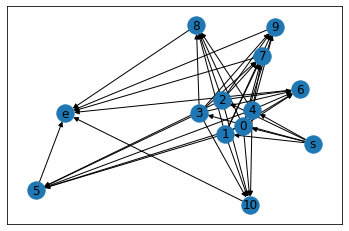

In [15]:
import numpy as np
import networkx as nx
np.random.seed(5)
y = np.random.randint(2,size = (8,12)).reshape(8,-1,3)
b  =  np.random.randint(1,size = (8,20))
f = b.reshape(8,-1,12//3)
fac_sizes = [50,100,300]
supplies = [25,15,80,19,14]
facility_sizes_for_y = y * fac_sizes
y_ix = np.where(y == 1)
for pop in range(f.shape[0]):
    G = nx.DiGraph()
    lookup = np.where(y_ix[0] == pop)
    for i in range(0,len(supplies)):
        G.add_edge("s",i,capacity=supplies[i])
        for j,cap in enumerate(facility_sizes_for_y[y_ix][lookup]):
            G.add_edge(i,j+len(supplies),capacity=supplies[i])
            G.add_edge(j+len(supplies),"e", capacity=cap)
    # print(G.edges())
    flow_value, flow_dict = nx.maximum_flow(G, "s", "e")
    facility_positions = y_ix[1][lookup]
    for i in range(len(supplies)):
        for ix, j in enumerate(flow_dict[i].values()):
            f[pop,i,facility_positions[ix]] = j
print(f)
print(flow_dict)
nx.draw_networkx(G)
    # print(flow_value)
    # print(flow_dict[0])


In [12]:
import numpy as np
def repair_placements(y, facility_sizes : np.ndarray, supplies : np.ndarray):
        """
        If the sum of the facility sizes for a given customer is less than the supply, then add the
        smallest facility size that will make the sum equal to the supply
        
        :param Z: the solution matrix
        :type Z: np.ndarray
        :param y_slice: the slice of the Z matrix that corresponds to the y variables
        :type y_slice: slice
        :param facility_sizes: the sizes of the facilities
        :type facility_sizes: np.ndarray
        :param supplies: the amount of supplies that each facility can handle
        :type supplies: np.ndarray
        :return: the Z matrix with the repaired sorting placements.
        """
        
        ix = np.where(np.sum(y,axis=2) > 1)
        y[ix] = 0 
        facility_sizes_for_y = y*facility_sizes
        smaller_than_sum = np.where(np.sum(np.sum(facility_sizes_for_y,axis=1),axis=1) < np.sum(supplies))
        while len(smaller_than_sum[0]) > 0:
            difference = np.ravel(np.sum(supplies) - np.sum(np.sum(facility_sizes_for_y[smaller_than_sum,:,:],axis=2),axis=2))
            for i,diff in enumerate(difference):
                print(y[smaller_than_sum[0][i],:,:])
                print(np.sum(y[smaller_than_sum[0][i],:,:],axis=1))
                if diff <= facility_sizes[0]:
                    x = np.sum(y[smaller_than_sum[0][i],:,:],axis=1).tolist().index(0)
                    y[smaller_than_sum[0][i],:,:][x,0] = 1
                elif diff <= facility_sizes[1]:
                    x = np.sum(y[smaller_than_sum[0][i],:,:],axis=1).tolist().index(0)
                    y[smaller_than_sum[0][i],:,:][x,1] = 1
                elif diff <= facility_sizes[2]:
                    x = np.sum(y[smaller_than_sum[0][i],:,:],axis=1).tolist().index(0)
                    y[smaller_than_sum[0][i],:,:][x,2] = 1
                else:

                    x = np.sum(y[smaller_than_sum[0][i],:,:],axis=1).tolist().index(0)
                    y[smaller_than_sum[0][i],:,:][x,2] = 1
            facility_sizes_for_y = y*facility_sizes
            smaller_than_sum = np.where(np.sum(np.sum(facility_sizes_for_y,axis=1),axis=1) < np.sum(supplies))
            difference = np.ravel(np.sum(supplies) - np.sum(np.sum(facility_sizes_for_y[smaller_than_sum,:,:],axis=2),axis=2))
        return y
np.random.seed(10)
y_sort = np.random.randint(2,size = (8,12)).reshape(8,-1,3)
supplies = [25,15,80,19,14]
fac_sizes_sort = [50,100,300]
y_sort = repair_placements(y_sort, fac_sizes_sort, supplies)
# print(y_sort)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[0 0 0 0]
[[1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]]
[1 1 0 1]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[0 0 0 0]
[[1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]]
[1 1 0 0]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[0 0 0 0]


[[[ 0 25  0  0]
  [ 0 15  0  0]
  [ 0 80  0  0]
  [ 0 19  0  0]
  [ 0 14  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [80  0  0  0]
  [19  0  0  0]
  [14  0  0  0]]

 [[ 0  0 25  0]
  [ 0  0 15  0]
  [ 0  0 80  0]
  [ 0  0 19  0]
  [ 0  0 14  0]]

 [[ 0  0 25  0]
  [ 0  0 15  0]
  [ 0  0 80  0]
  [ 0  0 19  0]
  [ 0  0 14  0]]

 [[ 0 25  0  0]
  [ 0 15  0  0]
  [ 0 80  0  0]
  [ 0 19  0  0]
  [ 0 14  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [80  0  0  0]
  [19  0  0  0]
  [14  0  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [80  0  0  0]
  [19  0  0  0]
  [14  0  0  0]]

 [[25  0  0  0]
  [15  0  0  0]
  [80  0  0  0]
  [19  0  0  0]
  [14  0  0  0]]]
[[[50  3  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  

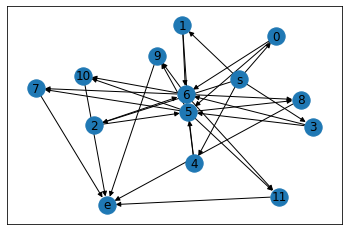

In [110]:
import numpy as np
import networkx as nx
from collections import OrderedDict
np.random.seed(5)
pop_amt = 8
y_sort = np.random.randint(2,size = (pop_amt,12)).reshape(pop_amt,-1,3)
y_inc = np.random.randint(2,size = (pop_amt,9)).reshape(pop_amt,-1,3)
y_lf = np.random.randint(2,size = (pop_amt,9)).reshape(pop_amt,-1,3)
f_sort  =  np.random.randint(1,size = (pop_amt,20)).reshape(pop_amt,-1,12//3)
f_inc  =  np.random.randint(1,size = (pop_amt,12)).reshape(pop_amt,-1,9//3)
f_lf  =  np.random.randint(1,size = (pop_amt,12)).reshape(pop_amt,-1,9//3)
fac_sizes_sort = [50,100,300]
fac_sizes_inc_lf = [50,100,150]
supplies = [25,15,80,19,14]
y_sort = repair_placements(y_sort, fac_sizes_sort, supplies)
y_inc = repair_placements(y_inc, fac_sizes_inc_lf, supplies)
y_lf = repair_placements(y_lf, fac_sizes_inc_lf, supplies)


facility_sorting_sizes_for_y = y_sort * fac_sizes_sort
facility_inc_sizes_for_y = y_inc * fac_sizes_inc_lf
facility_lf_sizes_for_y = y_lf * fac_sizes_inc_lf
y_ix_sort = np.where(y_sort == 1)
y_ix_inc = np.where(y_inc == 1)
y_ix_lf = np.where(y_lf == 1)
for pop in range(f_sort.shape[0]):
    G = nx.DiGraph()
    lookup_sort = np.where(y_ix_sort[0] == pop)
    lookup_inc = np.where(y_ix_inc[0] == pop)
    lookup_lf = np.where(y_ix_lf[0] == pop)
    for i in range(0,len(supplies)):
        G.add_edge("s",i,capacity=supplies[i])
        for j in range(len(lookup_sort[0])):
            G.add_edge(i,j+len(supplies),capacity=supplies[i])
    for j in range(len(lookup_sort[0])):
        sorting_facility = j+len(supplies)
        for l in range(len(lookup_inc[0])):
            incinerator_facility = l+len(supplies)+len(lookup_sort[0])
            G.add_edge(sorting_facility, incinerator_facility, capacity=facility_sorting_sizes_for_y[y_ix_sort][lookup_sort][j])
            G.add_edge(incinerator_facility,"e", capacity=facility_inc_sizes_for_y[y_ix_inc][lookup_inc][l])
        for l in range(len(lookup_lf[0])):
            landfill_facility = l+len(supplies)+len(lookup_sort[0])+ len(lookup_inc[0])
            G.add_edge(sorting_facility, landfill_facility, capacity=facility_sorting_sizes_for_y[y_ix_sort][lookup_sort][j])
            G.add_edge(landfill_facility,"e", capacity=facility_lf_sizes_for_y[y_ix_lf][lookup_lf][l])
    flow_value, flow_dict = nx.maximum_flow(G, "s", "e")

    facility_positions_sorting = y_ix_sort[1][lookup_sort]
    facility_positions_incinerator = y_ix_inc[1][lookup_inc]
    facility_positions_landfill = y_ix_lf[1][lookup_lf]
    for i in range(len(supplies)):
        for ix, j in enumerate(flow_dict[i].values()):
            f_sort[pop,i,facility_positions_sorting[ix]] = j
    for i in range(len(facility_positions_sorting)):
        sorting_facility = i+len(supplies)
        for ix, j in enumerate(flow_dict[sorting_facility].values()):
            if ix+1 > len(facility_positions_incinerator):
                f_lf[pop,i,facility_positions_landfill[ix-len(facility_positions_incinerator)]] = j
            else: f_inc[pop,i,facility_positions_incinerator[ix]] = j
nx.draw_networkx(G)
print(f_sort)
print(f_lf)
print(f_inc)
    # print(flow_value)
    # print(flow_dict[0])


In [6]:
import numpy as np
np.random.seed(15)
a = np.random.randint(2,size = (3,18)).reshape(3,-1,3)
# print("a",a)
b  =  np.random.randint(2,size = (3,42))
f = b.reshape(3,-1,18//3)
l =  np.random.randint(50,size = (3,6)).reshape(3,-1,9//3)
print("a",a)
print("b",f)
print(f.shape)
# print("l",l)
c = np.where(np.sum(f,axis=2) == 3)
print(c)
a[c]
# aaa = np.array([100,200])
# print(c[1])
# print()
# # print(f[c[0],:,c[1]])
# # a[c] = 0
# # print(a)
# print(l)
# ff = aaa - np.sum(l, axis = 2)
# print(ff)
# dddd = l 
# print(dddd)
# print(l)

a [[[0 1 0]
  [1 1 0]
  [0 1 1]
  [1 1 0]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [1 0 1]
  [1 1 1]
  [0 1 0]
  [1 1 0]
  [1 0 0]]

 [[1 1 1]
  [0 1 0]
  [0 1 0]
  [1 0 1]
  [0 1 0]
  [0 0 1]]]
b [[[0 1 0 0 1 0]
  [1 0 0 0 1 1]
  [1 0 1 0 1 1]
  [1 0 0 1 1 1]
  [0 0 0 0 0 1]
  [0 0 0 1 0 1]
  [1 0 1 1 1 0]]

 [[1 0 0 0 0 1]
  [0 0 1 0 0 0]
  [0 1 1 0 1 0]
  [0 1 0 0 0 0]
  [0 1 0 0 1 0]
  [0 0 0 0 1 1]
  [1 0 1 1 0 1]]

 [[1 0 1 1 0 0]
  [1 0 0 1 0 0]
  [1 0 0 0 1 0]
  [0 1 1 1 1 0]
  [0 1 1 0 1 1]
  [0 0 1 1 0 1]
  [0 1 0 0 0 1]]]
(3, 7, 6)
(array([0, 1, 2, 2]), array([1, 2, 0, 5]))


array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1]])

In [12]:
three_objective_problem.evaluate(result_vectorized.X, t = 1)

[[7.82 26.382 0.0 0.0 0.0 0.0 -18.003 0.0 -18.003 0.0 -18.003 0.0
  -0.0030000000000001137 0 0.0 0 -32.003 0 0.0 0 -0.0030000000000001137 0
  0.0 0 -32.003 0 0.0 0 -0.0030000000000001137 0 0.0 0 -32.003 0 0.0 0 0
  -1 0 -1 0 -1]]


(array([[1.51946507e+07, 2.38732000e+01, 3.63988008e+04]]), array([[34.202]]))

In [7]:
11.254967009173692 +13.895158290001497 +7.560992859876862 + 0.0005652847091610624 +0.08980814757485689 + 0.10831655623879044 +  0.019073693373094613

32.92888184094795

In [ ]:
4.90494E+07

In [ ]:
pool = mp.pool.ThreadPool()
three_objective_problem = Elementwise_heuristic(parameters, runner=pool.starmap, fgunc_eval = starmap_parallelized_eval)
minimization = Minimize(problem = three_objective_problem, population_size = 1000, number_of_generations = 800, verbose = verbose, nsga3 = nsga3)
result_elementwise = minimization.minimize_heuristic()
print('Time for 3 objective execution Elementwise:', result_elementwise.exec_time)
pool.close()